# TPOT教学
by:Asdil

自动化机器学习（Automatic Machine Learning，简称AML）是一种流水线（也称管道），它能够让你自动执行机器学习（ML）问题中的重复步骤，从而节省时间，让你专注于使你的专业知识发挥更高价值。最重要的是，它不只是一些模糊的想法，而是我们已经可以使用很多基于标准python ML包建立的应用包，如scikit-learn等等。

在这种情况下，任何熟悉机器学习的人都可能会回想起网格搜索（grid search）这个概念。他们这样想是完全正确的。实际上，AML是在scikit-learn中应用的网格搜索的扩展，而不是迭代这些值预先定义的集合和其组合，它通过搜索方法，特征，变换和参数值来获得最佳解决方案。因此，AML「网格搜索」不需要在可能的配置空间上进行详尽的搜索——AML有一个很赞的应用叫做TPOT包，其提供了像遗传算法这样的应用，可用来在某个配置中混合各个参数并达到最佳设置。

在这篇文章中，我将简要介绍一些AML的基础知识，然后在应用中使用TPOT软件包，并且包括遗传算法解决方案的优化问题。

基本概念非常简单，一旦我们收到原始数据，我们就开始使用标准的ML流水线。
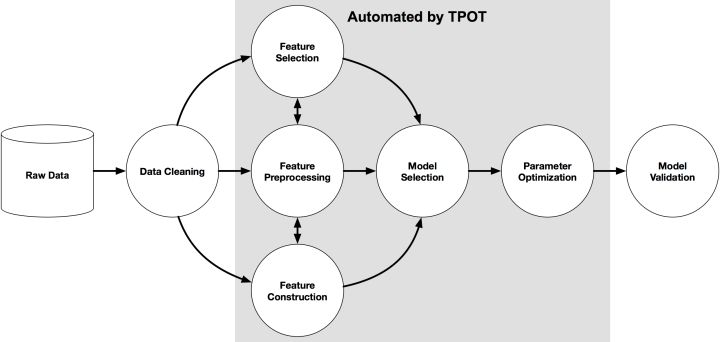
在这条流水线中，我们有一些针对于给定数据集／问题的步骤，很明显数据清理的自动化是一个问题。 然而，在这个过程中，我们得到以下任务：

特征预处理
特征选择
模型选择
...
这些任务的共同之处在于，在每个方案中我们先使用一组方法，然后我们评估其性能（特征重要性，模型性能...）。由于我们对各个步骤有明确的指标，所以我们可以自动化流程。在这里，我们在方法、特征、变换和参数值中获得AML搜索的最佳解决方案。

## 优势
除了明显的节省时间的特点外，还有其他优点。这个应用的其中一个优点曾发表在Airbnb的这篇博客中，就是能够轻松创建基准（他们也提到了其他的优点）。这使我们能够判断现有ML模型的性能，并将他与其他模型的相关值进行关联。

另一个优势是规范作用于任何ML任务的基本方法。它不是一个经典的文档或指南，而是我们可以准备一个设置，它可以直接让解决这个问题的人使用。

此外，它使我们能够执行快速原型设计的任务，例如，为用户更好地估计基本模型可以实现的性能，而无需实施它们。 这个结果只是一个配置而且无需执行。

# 教学开始

In [16]:
# 加载模型和数据集
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [17]:
iris = load_iris()
data = iris.data
target = iris.target

为了直观展示，把它打包成DataFrame

In [18]:
df = pd.DataFrame(data, columns=['SL', 'SW', 'PL', 'PW']) # 分表表示 花萼长度 花萼宽度 花瓣长度 花瓣宽度
df['Y'] = target

查看数据形状

In [19]:
df.head(5)

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


划分训练集测试集

In [20]:
train, test = train_test_split(df, train_size=0.75, test_size=0.25)
print('训练集大小: ', len(train))
print('测试集大小: ', len(test))

训练集大小:  112
测试集大小:  38


In [21]:
# 开始训练数据
tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
tpot.fit(train.iloc[:,:-1], train.iloc[:,-1])

Version 0.9.1 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
Optimization Progress: 100%|██████████| 200/200 [00:41<00:00,  5.52pipeline/s]

Generation 1 - Current best internal CV score: 0.9644268774703558


Optimization Progress: 100%|██████████| 300/300 [01:09<00:00,  3.26pipeline/s]

Generation 2 - Current best internal CV score: 0.9817805383022774


Optimization Progress: 100%|██████████| 400/400 [01:46<00:00,  2.61pipeline/s]

Generation 3 - Current best internal CV score: 0.9817805383022774



2.0003024166666665 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(LogisticRegression(input_matrix, C=0.01, dual=False, penalty=l2), C=5.0, dual=True, penalty=l2)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=1000000, max_eval_time_mins=5,
        max_time_mins=2, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=100, periodic_checkpoint_folder=None,
        population_size=100, random_state=None, scoring=None,
        subsample=1.0, verbosity=2, warm_start=False)

In [22]:
# 查看测试集得分
print(tpot.score(test.iloc[:,:-1], test.iloc[:,-1]))

1.0


In [23]:
tpot.export('tpot_iris_pipeline.py')

True

In [ ]:
# 这就是导出的代码
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.9817805383022774
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LogisticRegression(C=0.01, dual=False, penalty="l2")),
    LogisticRegression(C=5.0, dual=True, penalty="l2")
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

## 接下来是手写体识别的例子

In [26]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [27]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [28]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=5, population_size=40)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Version 0.9.1 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
Optimization Progress: 100%|██████████| 80/80 [03:43<00:00,  1.02pipeline/s]

Generation 1 - Current best internal CV score: 0.9695219376244382



5.019854116666666 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, criterion=entropy, max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
0.966666666667


In [29]:
tpot.export('tpot_mnist_pipeline.py')

True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.9695219376244382
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


## Kaggle 泰坦尼克

Kaggle对泰坦尼克号的机器学习的竞争平台上最受欢迎的初学者的比赛之一。我们将使用来证明实施topt。

In [31]:
# 引入包
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

In [34]:
# 加载数据查看
titanic = pd.read_csv('data/titanic_train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据各维度查看

In [35]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [36]:
titanic.groupby(['Pclass','Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [37]:
id = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(float))


In [43]:
id.div(id.sum(1).astype(float), 0)

Survived            0.0       1.0
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

数据修改

In [44]:
# 修改类标签名为class
titanic.rename(columns={'Survived': 'class'}, inplace=True)

In [46]:
titanic.dtypes

PassengerId      int64
class            int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
# 查看每个属性有多少个不同值
for cat in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, titanic[cat].unique().size))

Number of levels in category 'Name':  891.00 
Number of levels in category 'Sex':  2.00 
Number of levels in category 'Ticket':  681.00 
Number of levels in category 'Cabin':  148.00 
Number of levels in category 'Embarked':  4.00 


In [48]:
# 性别和登船地点不同个数较少，查看
for cat in ['Sex', 'Embarked']:
    print("Levels for catgeory '{0}': {1}".format(cat, titanic[cat].unique()))

Levels for catgeory 'Sex': ['male' 'female']
Levels for catgeory 'Embarked': ['S' 'C' 'Q' nan]


In [49]:
# 标称属性数值化
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic['Embarked'] = titanic['Embarked'].map({'S':0,'C':1,'Q':2})

In [50]:
# 缺失值填充
titanic = titanic.fillna(-999)
pd.isnull(titanic).any()

PassengerId    False
class          False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [51]:
# onehot化
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
CabinTrans = mlb.fit_transform([{str(val)} for val in titanic['Cabin'].values])

In [53]:
CabinTrans

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [55]:
# 删除一些属性
titanic_new = titanic.drop(['Name','Ticket','Cabin','class'], axis=1)

In [59]:
# 检查onehot转化是否正确
assert (len(titanic['Cabin'].unique()) == len(mlb.classes_)), "Not Equal" #check correct encoding done

In [60]:
titanic_new = np.hstack((titanic_new.values,CabinTrans))

In [61]:
np.isnan(titanic_new).any()

False

In [63]:
# 查看新输入数据
titanic_new

array([[   1.,    3.,    0., ...,    0.,    0.,    0.],
       [   2.,    1.,    1., ...,    0.,    0.,    0.],
       [   3.,    3.,    1., ...,    0.,    0.,    0.],
       ..., 
       [ 889.,    3.,    1., ...,    0.,    0.,    0.],
       [ 890.,    1.,    0., ...,    0.,    0.,    0.],
       [ 891.,    3.,    0., ...,    0.,    0.,    0.]])

In [64]:
titanic_class = titanic['class'].values

## 使用TPOT了

In [65]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(titanic.index, stratify = titanic_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(668, 223)

In [68]:
# 注意种群代数(generate)很重要,标准计算机4G ram大概5min一代,那么100代需要花费8h
tpot = TPOTClassifier(verbosity=2, max_time_mins=5, max_eval_time_mins=0.04, population_size=40)
tpot.fit(titanic_new[training_indices], titanic_class[training_indices])

Version 0.9.1 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
Optimization Progress: 86pipeline [00:36,  1.52pipeline/s]                  

Generation 1 - Current best internal CV score: 0.8099714460280054


Optimization Progress: 129pipeline [00:59,  2.37pipeline/s]                   

Generation 2 - Current best internal CV score: 0.8129452985698075


Optimization Progress: 171pipeline [01:25,  1.94pipeline/s]                   

Generation 3 - Current best internal CV score: 0.8144715021384306


Optimization Progress: 212pipeline [01:48,  2.42pipeline/s]                   

Generation 4 - Current best internal CV score: 0.8323494474162187


Optimization Progress: 254pipeline [02:12,  2.29pipeline/s]                   

Generation 5 - Current best internal CV score: 0.8323494474162187


Optimization Progress: 295pipeline [02:41,  1.47pipeline/s]                   

Generation 6 - Current best internal CV score: 0.8323494474162187


Optimization Progress: 336pipeline [03:15,  1.39pipeline/s]                   

Generation 7 - Current best internal CV score: 0.8323494474162187


Optimization Progress: 376pipeline [03:50,  1.00pipeline/s]                   

Generation 8 - Current best internal CV score: 0.8323494474162187


Optimization Progress: 417pipeline [04:24,  1.66pipeline/s]                   

Generation 9 - Current best internal CV score: 0.8354129103854163



5.0230801000000005 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=2, min_samples_split=12, n_estimators=100)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=1000000, max_eval_time_mins=0.04,
        max_time_mins=5, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=40, periodic_checkpoint_folder=None,
        population_size=40, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [69]:
tpot.export('tpot_titanic_pipeline.py')

True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.8354129103854163
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.4, min_samples_leaf=2, min_samples_split=12, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [70]:
# 预测数据
# Read in the submission dataset
titanic_sub = pd.read_csv('data/titanic_test.csv')
titanic_sub.describe()
for var in ['Cabin']: #,'Name','Ticket']:
    new = list(set(titanic_sub[var]) - set(titanic[var]))
    titanic_sub.ix[titanic_sub[var].isin(new), var] = -999
titanic_sub['Sex'] = titanic_sub['Sex'].map({'male':0,'female':1})
titanic_sub['Embarked'] = titanic_sub['Embarked'].map({'S':0,'C':1,'Q':2})
titanic_sub = titanic_sub.fillna(-999)
pd.isnull(titanic_sub).any()

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
SubCabinTrans = mlb.fit([{str(val)} for val in titanic['Cabin'].values]).transform([{str(val)} for val in titanic_sub['Cabin'].values])
titanic_sub = titanic_sub.drop(['Name','Ticket','Cabin'], axis=1)
# Form the new submission data set
titanic_sub_new = np.hstack((titanic_sub.values,SubCabinTrans))
np.any(np.isnan(titanic_sub_new))
# Ensure equal number of features in both the final training and submission dataset
assert (titanic_new.shape[1] == titanic_sub_new.shape[1]), "Not Equal" 


/Users/fibrizoasdil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [71]:
# Generate the predictions
submission = tpot.predict(titanic_sub_new)

In [72]:
submission # 预测结果

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [75]:
titanic_sub_new.shape

(418, 156)

In [74]:
len(submission)

418

# 参数

Parameters:
    generations: int, optional (default=100) 种群代数
        运行管道优化过程的迭代次数。必须是正数。
        正常情况下数值越大优化效果越好<br>
    population_size: int, optional (default=100)
       每一代遗传规划种群中保留的个体数。必须是正数。
       正常情况下数值越大优化效果越好<br>
    offspring_size: int, optional (default=100)
       在每一个遗传程序生成中产生的后代数。必须是正数。
    mutation_rate: float, optional (default=0.9) 基因突变率
       范围内的遗传规划算法的突变率[ 0，1 ]。这个参数告诉GP算法每一代都有多少管道应用随机变化。
    crossover_rate: float, optional (default=0.1)
       范围内遗传规划算法的交叉率[ 0，1 ]。这个参数告诉遗传编程算法每一代有多少管道“繁殖”。
       我们建议使用默认参数，除非您了解交叉率如何影响GP算法。
    scoring: string or callable, optional (default='accuracy')
       'accuracy', 
       'adjusted_rand_score', 
       'average_precision', 
       'balanced_accuracy', 
       'f1', 
       'f1_macro', 
       'f1_micro', 
       'f1_samples', 
       'f1_weighted', 
       'neg_log_loss',
       'precision', 
       'precision_macro', 
       'precision_micro',     
       'precision_samples', 
       'precision_weighted', 
       'recall', 
       'recall_macro', 
       'recall_micro', 
       'recall_samples', 
       'recall_weighted', 
       'roc_auc' 
   cv: int, cross-validation generator, or an iterable, optional (default=5)
       评估管道时使用的交叉验证策略。
   subsample: float, optional (default=1.0)
       训练样本是在优化过程中使用的部分性。必须在射程内（0，1）
   n_jobs: integer, optional (default=1) 个数
      n_jobs=-1 将使用计算机上可用的多个内核。注意，在同一台机器上使用多个进程可能会导致大型数据集的内存问题。
   max_time_mins: integer or None, optional (default=None)
      优化管道的最长时间，如果没有则
   max_eval_time_mins: integer, optional (default=5)
      多少分钟TPOT评价单个管道。
      将该参数设置为较高的值会使性评估更复杂的管道，但也允许运行时间性。使用此参数可以帮助预防性评价耗时从管道浪费时间。
   random_state: integer or None, optional (default=None)
      使用此参数的确定性会给你同样的结果，每次你运行它，种子相同的数据集。
   config_dict: Python dictionary, string, or None, optional (default=None)
      比如tpot_config = {
    'sklearn.naive_bayes.GaussianNB': {
    },

    'sklearn.naive_bayes.BernoulliNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },

    'sklearn.naive_bayes.MultinomialNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    }
}
   
    warm_start: boolean, optional (default=False)
    periodic_checkpoint_folder: path string, optional (default: None)
        如果提供，一个文件夹，将定期保存性最好的管道至此而优化。
    
    early_stop: integer, optional (default: None) 如果给定的世代数没有改善，则终止优化过程。
        多少代性检查是否有任何改善优化过程。
    verbosity: integer, optional (default=0)
        多少信息，而它的运行性沟通。
        打印信息[0-3]